In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import vice
from astropy.io import fits
import seaborn as sns

In [3]:
import arya
from surp import gce_math as gcem

# Stars

In [60]:
def plot_cooh_errs(df, **kwargs):
    plt.errorbar(df["[o/h]"], df["[c/o]"], xerr=df["[o/h]_err"], yerr=df["[c/o]_err"], fmt="o", capsize=0, **kwargs)
    plt.xlabel("[O/H]")
    plt.ylabel("[C/O]")

In [4]:
amarsi19 = pd.read_csv("../data/amarsi_19.tsv", delimiter="\t *", comment="#", skiprows=[62, 63],)
amarsi19["[o/h]"] = amarsi19["[O/H]3N"]
amarsi19["[c/h]"] = amarsi19["[C/H]3N"]
amarsi19["[c/o]"] = amarsi19["[c/h]"] - amarsi19["[o/h]"] 

amarsi19["[o/h]_err"] = amarsi19["e_[O/H]3N"]
amarsi19["[c/h]_err"] = amarsi19["e_[C/H]3N"]
amarsi19["[c/o]_err"] = amarsi19["[o/h]_err"] + amarsi19["[c/h]_err"] 
amarsi19["[o/fe]"] = -amarsi19["[Fe/H]3L"] + amarsi19["[o/h]"]
amarsi19_sun = amarsi19.iloc[151]
amarsi19.drop(index=151, inplace=True)

/tmp/slurmtmp.25484599/ipykernel_64358/3032376907.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  amarsi19 = pd.read_csv("../data/amarsi_19.tsv", delimiter="\t *", comment="#", skiprows=[62, 63],)


- \[Fe/H\]3L      7.4962
- C/H\]1N       8.4333
- \[O/H\]3N       8.6754

Amarsi is a reanalysis of nissen 2014 and nissen 2007, uses nlte 3d models

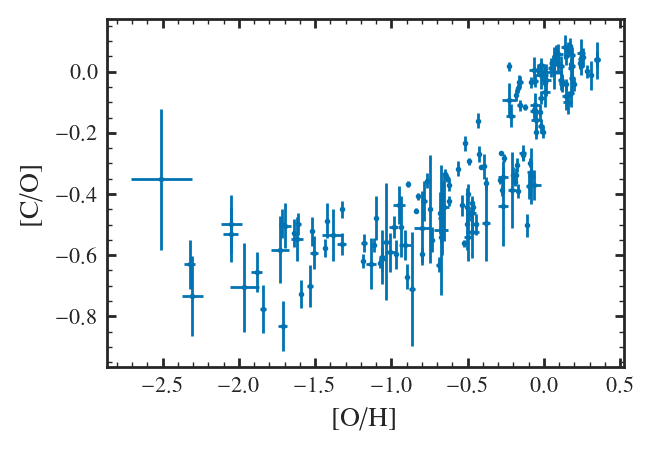

In [61]:
plot_cooh_errs(amarsi19, ms=1)

verified

In [13]:
b18 = pd.read_csv("../data/bedell18.dat", delimiter=" +", comment="#")

/tmp/slurmtmp.25484599/ipykernel_64358/1722035504.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  b18 = pd.read_csv("../data/bedell18.dat", delimiter=" +", comment="#")


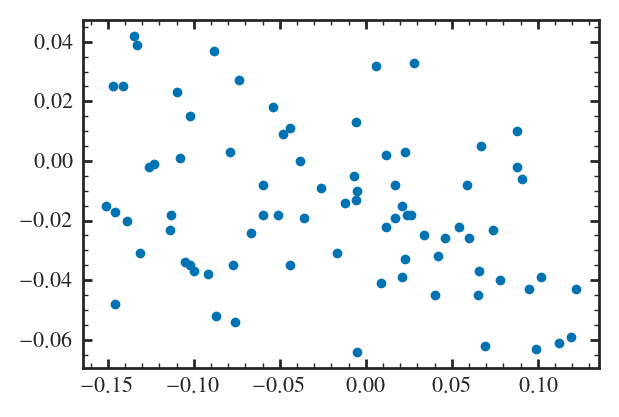

In [14]:
plt.scatter(b18["[OI/H]"], b18["[CI/H]"] - b18["[OI/H]"])

In [15]:
dm21 = pd.read_csv("../data/dm21.csv", delimiter="\t *", comment="#")
dm21["[o/h]"] = dm21["[O1/Fe]"] + dm21["[Fe/H]"]
dm21["[c/o]"] = dm21["[C/O1]"]

/tmp/slurmtmp.25484599/ipykernel_64358/1662530039.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dm21 = pd.read_csv("../data/dm21.csv", delimiter="\t *", comment="#")


In [16]:
bensby21 = pd.read_csv("../data/bensby21.tsv", delimiter="\t *", comment="#",)
bensby19 = pd.read_csv("../data/bensby19.tsv", delimiter="\t *", comment="#",)

bensby = bensby21.set_index("Name").join(bensby19.set_index("Name"),rsuffix="_b19", how="left")

bensby["[c/o]"] = bensby["[C/H]"] - bensby["[O/H]"]
bensby["[o/fe]"] = bensby["[O/H]"] - bensby["[Fe/H]"]
bensby["[o/h]"] = bensby["[O/H]"]
bensby["[c/o]_err"] = bensby["e_[C/O]"]
bensby["[o/h]_err"] = bensby["e_[O/H]"]

/tmp/slurmtmp.25484599/ipykernel_64358/461238490.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bensby21 = pd.read_csv("../data/bensby21.tsv", delimiter="\t *", comment="#",)
/tmp/slurmtmp.25484599/ipykernel_64358/461238490.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bensby19 = pd.read_csv("../data/bensby19.tsv", delimiter="\t *", comment="#",)


(1.0, -0.5)

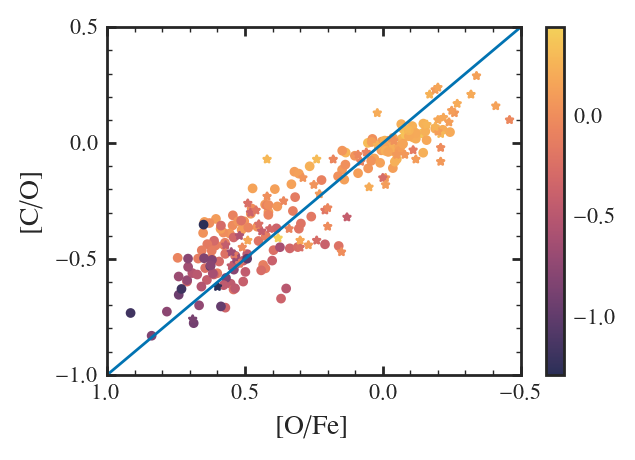

In [17]:
plt.scatter(amarsi19["[o/fe]"], amarsi19["[c/o]"], c=amarsi19["[o/h]"], clim=(-2.5, 0.5))
plt.scatter(bensby["[o/fe]"], bensby["[c/o]"], c=bensby["[O/H]"], marker="*")
plt.colorbar()
plt.xlabel("[O/Fe]")
plt.ylabel("[C/O]")
plt.gca().invert_xaxis()
plt.plot([-1, 1], [1, -1])
plt.ylim(-1, 0.5)
plt.xlim(1, -0.5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '[C/$\\alpha$]')

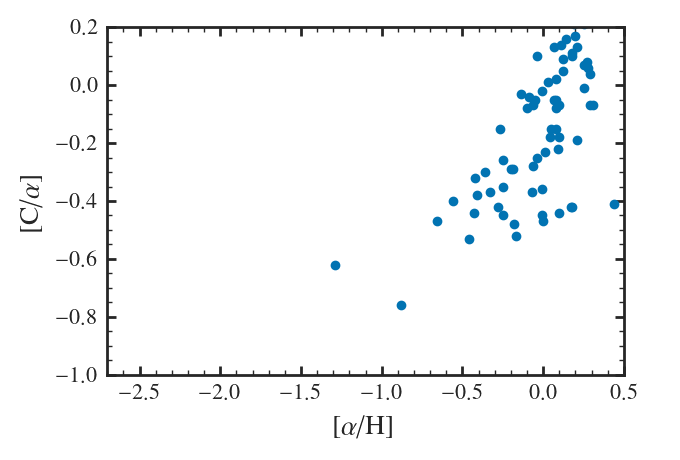

In [18]:
plt.xlim(-2.7, 0.5)

plt.scatter(bensby["[O/H]"], bensby["[c/o]"])
arya.Legend(loc=-1)
plt.ylim(-1, 0.2)
plt.xlabel("[$\\alpha$/H]")
plt.ylabel("[C/$\\alpha$]")

In [32]:
berg19 = pd.read_csv("../data/berg19.csv")
berg19 = berg19.iloc[:-1]
berg19["[c/o]"] = gcem.log_to_brak(berg19.log_c_o, "c", "o")
berg19["[o/h]"] = gcem.eps_to_brak(berg19.eps_o, "o")
berg19["[c/o]_err"] = berg19.log_c_o_err
berg19["[o/h]_err"] = berg19.eps_o_err

In [41]:
berg16 = pd.read_csv("../data/berg16.csv")
berg16["[c/o]"] = gcem.log_to_brak(berg16.log_c_o, "c", "o")
berg16["[o/h]"] = gcem.eps_to_brak(berg16.eps_o, "o")
berg16["[c/o]_err"] = berg16.log_c_o_err
berg16["[o/h]_err"] = berg16.eps_o_err

In [27]:
gcem.log_to_brak(-0.6, "c", "o")

-0.34005004043438436

In [28]:
gcem.eps_to_brak(8, "o")

-0.553292196763449

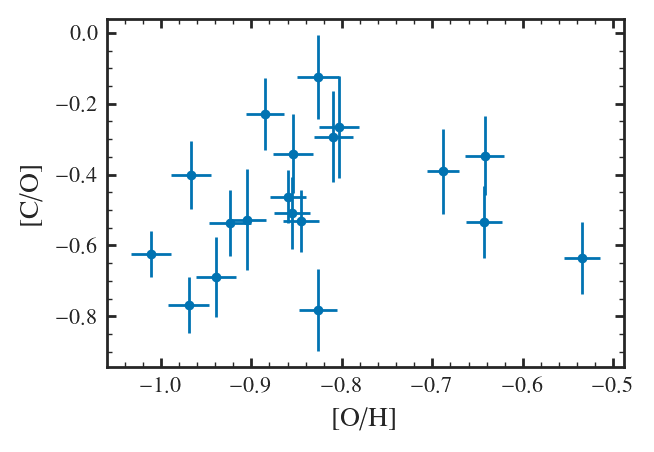

In [62]:
plot_cooh_errs(berg19)

verified

In [42]:
berg16

,name,log_c_o,log_c_o_err,eps_o,eps_o_err,[c/o],[o/h],[c/o]_err,[o/h]_err
0,J082555,-0.29,0.06,7.37,0.01,-0.03005,-1.183292,0.06,0.01
1,J104457,-0.71,0.06,7.45,0.02,-0.45005,-1.103292,0.06,0.02
2,J120122,-0.45,0.11,7.45,0.03,-0.19005,-1.103292,0.11,0.03
3,J124159,-0.82,0.16,7.73,0.04,-0.56005,-0.823292,0.16,0.04
4,J122622,-0.77,0.05,7.90,0.01,-0.51005,-0.653292,0.05,0.01
5,J122436,-0.59,0.07,7.84,0.02,-0.33005,-0.713292,0.07,0.02
6,J124827,-0.63,0.17,7.81,0.03,-0.37005,-0.743292,0.17,0.03


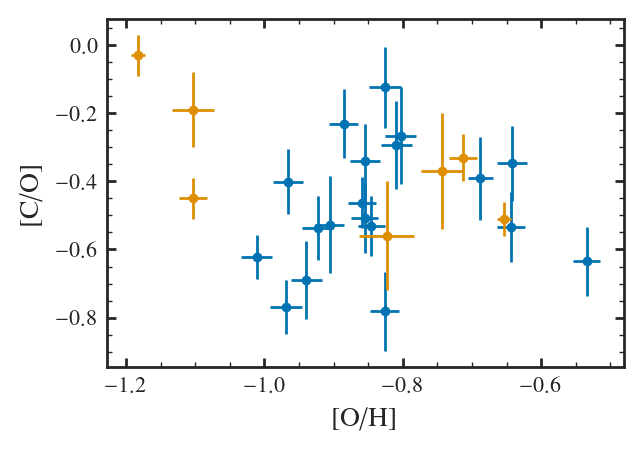

In [63]:
plot_cooh_errs(berg19)
plot_cooh_errs(berg16)

Not consistant with B19 figures

Below this is Lya, compilation of : a1: Cooke et al. (2015); 2: Dutta et al. (2014); 3: Cooke et al. (2014);
4: Ellison et al. (2010); 5: Cooke et al. (2011b); 6: This work; 7: Pettini et al.
(2008); 8: Morrison et al. (2016); 9: Srianand et al. (2010); 10: Cooke et al.
(2012); 11: Dessauges-Zavadsky et al. (2003)

In [48]:
cooke17 = pd.read_csv("../data/cooke17.csv")

cooke17["[c/o]"] = cooke17.c_o
cooke17["[c/o]_err"] = cooke17.c_o_err
cooke17["[o/h]"] = cooke17.o_h
cooke17["[o/h]_err"] = cooke17.o_h_err


In [49]:
cooke17

,Name,z,c_o,c_o_err,o_h,o_h_err,[c/o],[c/o]_err,[o/h],[o/h]_err
0,J0035-0918,2.340,0.08,0.160,-2.440,0.070,0.08,0.160,-2.440,0.070
1,HS0105+1619,2.536,0.11,0.045,-1.776,0.021,0.11,0.045,-1.776,0.021
2,J0140-0839,3.696,-0.30,0.080,-2.750,0.150,-0.30,0.080,-2.750,0.150
3,J0311-1722,3.734,-0.42,0.110,-2.290,0.100,-0.42,0.110,-2.290,0.100
4,J0903+2628,3.077,-0.38,0.030,-3.050,0.050,-0.38,0.030,-3.050,0.050
5,Q0913+072,2.618,-0.36,0.012,-2.416,0.011,-0.36,0.012,-2.416,0.011
6,J0953-0504,4.202,-0.50,0.030,-2.550,0.100,-0.50,0.030,-2.550,0.100
7,J1001+0343,3.078,-0.41,0.030,-2.650,0.050,-0.41,0.030,-2.650,0.050
8,J1016+4040,2.816,-0.21,0.050,-2.460,0.110,-0.21,0.050,-2.460,0.110
9,Q1111+1332,2.270,-0.18,0.110,-1.920,0.080,-0.18,0.110,-1.920,0.080


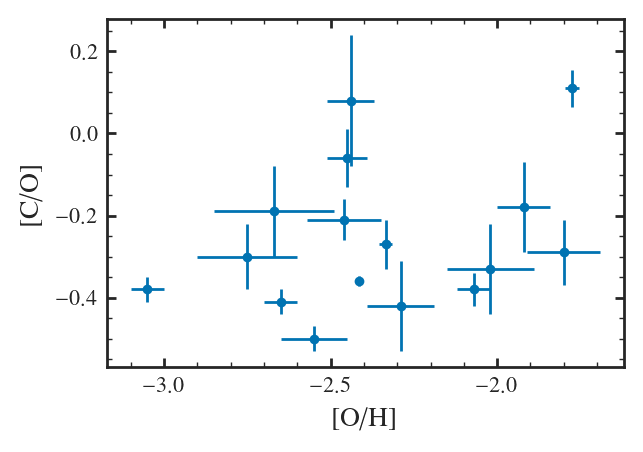

In [64]:
plot_cooh_errs(cooke17)

verified :)

1: Cooke et al. (2015); 2: Dutta et al. (2014); 3: Cooke et al. (2014); 4: Ellison et al. (2010); 5: Cooke et al. (2011b); 6: This work; 7: Pettini et al. (2008); 8: Morrison et al. (2016); 9: Srianand et al. (2010); 10: Cooke et al. (2012); 11: Dessauges-Zavadsky et al. (2003).

In [52]:
RL = pd.read_csv("../data/extragalactic_RL.csv", sep="\t+")
RL["[c/o]"] = gcem.log_to_brak(RL.eps_c - RL.eps_o, "c", "o")
RL["[o/h]"] = gcem.eps_to_brak(RL.eps_o, "o")
RL["[c/o]_err"] = RL.c_err + RL.o_err
RL["[o/h]_err"] = RL.o_err 

/tmp/slurmtmp.25484599/ipykernel_64358/2753542868.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  RL = pd.read_csv("../data/extragalactic_RL.csv", sep="\t+")


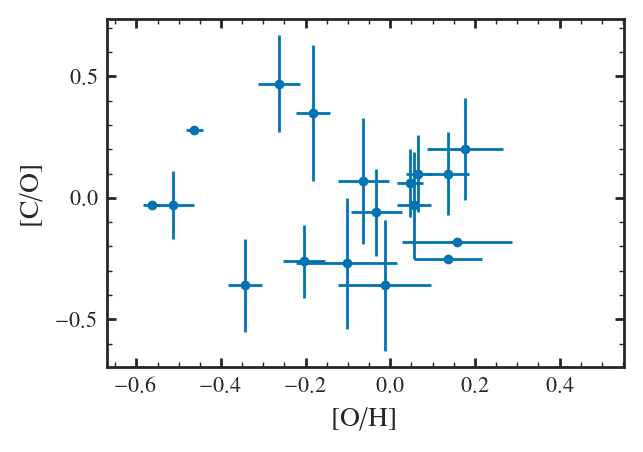

In [76]:
plot_cooh_errs(RL)

Missing points, errors too large

In [17]:
flf21 = pd.read_csv("../data/FLF21.csv", delimiter="\s+", comment="#")
flf21["[o/h]"] = flf21["[O/Fe]"] + flf21["[Fe/H]"]
flf21["[c/o]"] = flf21["[C/Fe]"] - flf21["[O/Fe]"]

# NOT COMPARABLE SAMPLE< HAS GIANTZ

In [18]:
F09 = pd.read_csv("../data/Fabbian09.csv", sep="\s+")

Redshift: (Pettini et al. 2000;
Fosbury & Villar-Martín et al. 2003; Erb et al. 2010; Christensen
et al. 2012; Bayliss et al. 2014; James et al. 2014; Stark et al.
2014; Steidel et al. 2016; Vanzella et al. 2016; Amorín et al.
2017; Berg et al. 2018; Rigby et al. 2018)

RL: (teal squares: Esteban et al. 2002, 2009,
2014; Pilyugin & Thuan 2005; García-Rojas & Esteban 2007;
López-Sánchez et al. 2007).

CL: Senchyna et al. (2017) and Peña-Guerrero et al. (2017)

MW stars: Gustafsson et al. (1999), Akerman
et al. (2004), Fabbian et al. (2009), and Nissen et al. (2014)

In [70]:
def read_skillman20():
    df = pd.read_csv("../data/chaos_m101.dat", sep="\s+")
    df1 = pd.DataFrame()
    df1["[o/h]"] = gcem.eps_to_brak(df["O_H"], "o")
    df1["[c/o]"] = gcem.log_to_brak(df["C_O"], "c", "o")
    df1["[c/n]"] = gcem.log_to_brak(df["C_N"], "c", "n")
    df1["[n/o]"] = df1["[c/o]"] - df1["[c/n]"]

    df1["[o/h]_err"] = df["O_H_err"]
    df1["[c/o]_err"] = df["C_O_err"] 
    df1["[c/n]_err"] = df["C_N_err"] * 12/14
    df1["[n/o]_err"] = df["C_O_err"] + df["C_N_err"]

    df1.name="M101"
    return df1

skillman20 = read_skillman20()

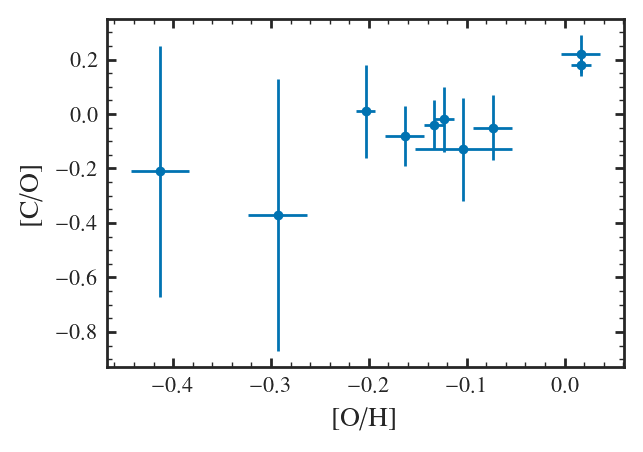

In [71]:
plot_cooh_errs(skillman20)

verified, maybe 0.01 dex errors?

In [72]:
def read_md22():
    df = pd.read_csv("../data/md22.csv")
    df1 = pd.DataFrame()
    df1["[o/h]"] = gcem.eps_to_brak(df["O_H"], "o")
    df1["[c/h]"] = gcem.eps_to_brak(df["C_H"], "c")
    df1["[n/h]"] = gcem.eps_to_brak(df["N_H"], "n")

    df1["[c/n]"] = df1["[c/h]"] - df1["[n/h]"]
    df1["[c/o]"] = df1["[c/h]"] - df1["[o/h]"]
    df1["[n/o]"] = df1["[n/h]"] - df1["[o/h]"]

    df1["[o/h]_err"] = df["O_H_err"]
    df1["[c/o]_err"] = df["C_H_err"] + df["O_H_err"]
    df1["[n/o]_err"] = df["N_H_err"] + df["O_H_err"]
    df1["[c/n]_err"] = df["C_H_err"] + df["N_H_err"]

    df1.name = "Milkyway"
    return df1
md22 = read_md22()

In [74]:
md22

,[o/h],[c/h],[n/h],[c/n],[c/o],[n/o],[o/h]_err,[c/o]_err,[n/o]_err,[c/n]_err
0,0.026708,-0.033342,-0.013142,-0.0202,-0.06005,-0.03985,0.05,0.14,0.11,0.15
1,0.056708,-0.093342,-0.143142,0.0498,-0.15005,-0.19985,0.10,0.16,0.20,0.16
2,0.236708,0.206658,0.166858,0.0398,-0.03005,-0.06985,0.04,0.08,0.13,0.13
3,0.146708,0.246658,0.216858,0.0298,0.09995,0.07015,0.05,0.12,0.19,0.21
4,0.136708,0.236658,0.256858,-0.0202,0.09995,0.12015,0.05,0.11,0.10,0.11
5,0.236708,0.326658,0.426858,-0.1002,0.08995,0.19015,0.06,0.16,0.13,0.17
6,0.276708,0.506658,0.256858,0.2498,0.22995,-0.01985,0.05,0.09,0.15,0.14
7,0.206708,0.226658,0.206858,0.0198,0.01995,0.00015,0.05,0.24,0.55,0.69
8,0.226708,0.176658,0.326858,-0.1502,-0.05005,0.10015,0.05,0.10,0.19,0.19


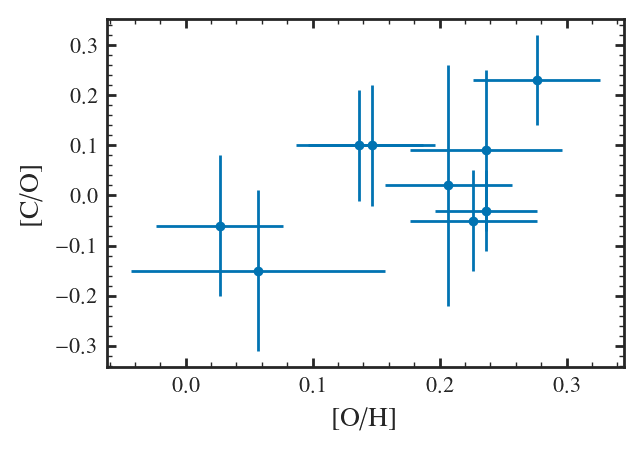

In [73]:
plot_cooh_errs(md22)

need to verify....

In [77]:
all_abundances = pd.DataFrame(columns=["[c/o]", "[c/o]_err", "[o/h]", "[o/h]_err", "type"])


for df, label in [(RL, "RL"), (berg19, "dwarf"), (skillman20, "RL"), (md22, "RL"), 
                  (cooke17, "DLA"), (amarsi19, "star"), (bensby, "star")]:
    all_abundances = pd.concat([
        all_abundances, 
        pd.DataFrame({
        "[c/o]": df["[c/o]"],
        "[c/o]_err": df["[c/o]_err"],
        "[o/h]": df["[o/h]"],
        "[o/h]_err": df["[o/h]_err"],
        "type": [label]*len(df)
    })], ignore_index=True)


In [78]:
all_abundances.to_csv("all_data.csv")